In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser

In [2]:
# Carregando os dados do Ceará no novo dataframe
casos_ce = pd.read_csv('casos_ce.csv')

In [3]:
# Fazendo cast da coluna date para data
casos_ce['date'] = pd.to_datetime(casos_ce['date'])
# Casos de Quixadá
cidade = 'Quixadá'
dfqx = casos_ce[(casos_ce.city == cidade)].copy()
dfqx.to_csv('casos_qxda.csv', index=False)

In [4]:
# Retirando as colunas que não serão necessárias.
casos_ce.drop(columns=['state', 
                       'place_type',
                       'order_for_place',
                       'estimated_population_2019',
                       'estimated_population',
                       'city_ibge_code',
                       'confirmed_per_100k_inhabitants',
                       'death_rate'], inplace=True)

In [5]:
# Retirando as linhas que tenham city = nan
casos_ce.dropna(subset = ["city"], inplace=True)

In [6]:
casos_ce.set_index('date', inplace=True)

In [7]:
# Casos de Quixadá
cidade = 'Quixadá'
dfqx = casos_ce[(casos_ce.city == cidade)].copy()

In [8]:
dados_data = dfqx.index.max().strftime('%Y-%m-%d')
casos_confirmados = dfqx[dfqx.is_last == True].confirmed.values[0]
obitos_confirmados = dfqx[dfqx.is_last == True].deaths.values[0]

In [9]:
# Trabalhando com a visão
import ipywidgets as widgets
file = open("bandeira_quixada.png", "rb")
image = file.read()
image_sidebar = widgets.Image(
    value=image,
    format='png',
    width=160,
    height=90,
)

In [10]:
header_right = widgets.HTML("<h1 style='margin-left: 150px'>Painel COVID-19 Quixadá</h1>")
header = widgets.HBox([image_sidebar, header_right])

In [13]:
widgets.AppLayout(header=header,
          left_sidebar=None,
          center=None,
          right_sidebar=None,
          footer=None)

AppLayout(children=(HBox(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00\…

In [14]:
from IPython.display import display, Markdown
Markdown('<strong>Data dos dados: {}</strong>'.format(dados_data))

<strong>Data dos dados: 2021-05-13</strong>

In [15]:
Markdown('<strong>Casos confirmados: {}</strong>'.format(casos_confirmados))

<strong>Casos confirmados: 7474</strong>

In [16]:
Markdown('<strong>Óbitos confirmados: {}</strong>'.format(obitos_confirmados))

<strong>Óbitos confirmados: 134</strong>

### Óbitos ao longo da pandemia

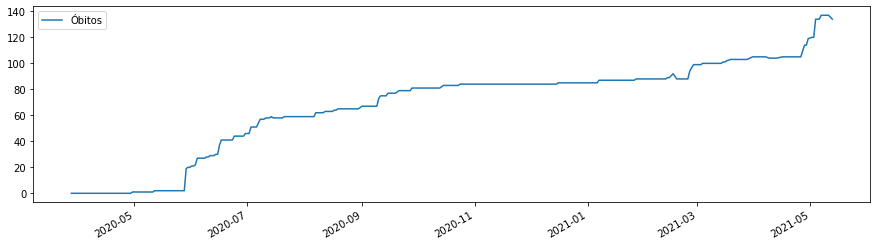

In [17]:
plot = dfqx.deaths.plot(figsize=(15,4), label='Óbitos')
#plot.set_title('Óbitos por COVID-19 em '+cidade+' ao longo da pandemia: '+str(dfqx.deaths.max())+'. | '+dfqx.index.max().strftime('%Y-%m-%d'))
plot.set_xlabel('')
plot.legend();

### Óbitos por dia ao longo da pandemia

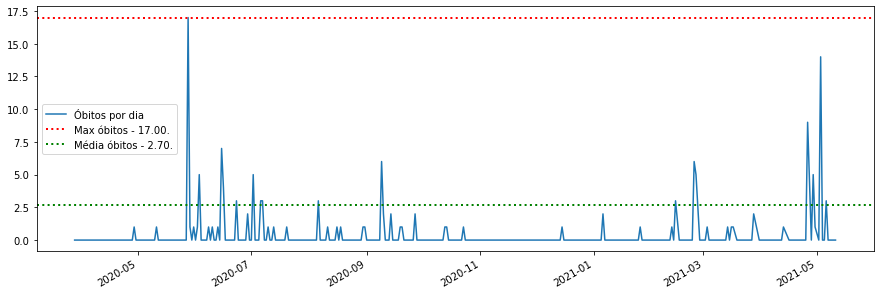

In [18]:
#dfqx = casos_ce[(casos_ce.city == cidade)].copy()
dfqx_2 = dfqx['deaths'].copy().shift() - dfqx['deaths'].copy()
dfqx['obitos_dia'] = dfqx_2

dfqx.loc[dfqx['obitos_dia'] < 0, 'obitos_dia'] = 0

plot2 = dfqx.obitos_dia.plot(figsize=(15,5), label='Óbitos por dia')
#plot2.set_title('Óbitos diários por COVID-19 em '+cidade+' ao longo da pandemia. | '+dfqx.index.max().strftime('%Y-%m-%d'))

obitos_max = dfqx.obitos_dia.max()
obitos_media = dfqx[dfqx.obitos_dia > 0].obitos_dia.mean()

plot2.axhline(y=obitos_max, xmin=0, xmax=1, color='r', linestyle=':', lw=2, label="Max óbitos - {num:.2f}.".format(num = obitos_max))
plot2.axhline(y=obitos_media, xmin=0, xmax=1, color='g', linestyle=':', lw=2, label="Média óbitos - {num:.2f}.".format(num = obitos_media))

plot2.set_xlabel('')
plot2.legend();